#Homework 5

In [106]:
from google.colab import drive
drive.mount("/content/drive") #mounting drive to this colab notebook


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy as sp
from scipy import stats


##Data Retrival

##LL84


In [108]:
ll84 = pd.read_csv("https://data.cityofnewyork.us/api/views/8u86-bviy/rows.csv")

ll84.head()



,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161.0,FT WASHINGTON AVENUE,Manhattan,891040.0,H

In [0]:
ll84MN = ll84[ll84.Borough == "Manhattan"]

##Pluto

In [110]:
!wget "https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip"

--2019-10-01 23:22:31--  https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v2_1_csv.zip
Resolving www1.nyc.gov (www1.nyc.gov)... 23.199.181.110, 2600:1402:3800:290::1500, 2600:1402:3800:29d::1500
Connecting to www1.nyc.gov (www1.nyc.gov)|23.199.181.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82994022 (79M) [application/zip]
Saving to: ‘nyc_pluto_18v2_1_csv.zip.1’

nyc_pluto_18v2_1_cs 100%[===================>]  79.15M   116MB/s    in 0.7s    

2019-10-01 23:22:31 (116 MB/s) - ‘nyc_pluto_18v2_1_csv.zip.1’ saved [82994022/82994022]



In [111]:
!unzip nyc_pluto_18v2_1_csv.zip -d "drive/My Drive/dsps/"

Archive:  nyc_pluto_18v2_1_csv.zip
replace drive/My Drive/dsps/pluto_18v2_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace drive/My Drive/dsps/PLUTODD18v2.1.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace drive/My Drive/dsps/PlutoReadme18v2.1.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


##Data Fusion

###Select Data for the Buildings in the borough of manhattan

In [112]:
pluto18v2_1 = pd.read_csv("drive/My Drive/dsps/pluto_18v2_1.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17,18,20,22,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
#use broadcasting to select data for the borough of Manhattan


plutoMNData = pluto18v2_1[pluto18v2_1.borough == "MN"]


plutoMNData.head()




,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
7,MN,707.0,45.0,104.0,99.0,1039.0,2.0,3.0,10018.0,E034,10.0,5500.0,1.0,2A,512 WEST 36 STREET,C6-4,NaN,NaN,NaN,NaN,NaN,HY,NaN,NaN,NaN,N,G7,10.0,0.0,NaN,511 WEST 35TH STREET,2469.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,994500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,10.0,10.0,1.0,1.007070e+09,0.0,99.0,984499.0,214706.0,8d,NaN,105S027,10302,E-137,0.000000e+00,NaN,NaN,1.0,18v2.1,4.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
12,MN,1486.0,4.0,108.0,132.0,7002.0,2.0,5.0,10021.0,E044,19.0,4300.0,1.0,2B,1402 YORK AVENUE,R10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,V1,11.0,0.0,NaN,1402 YORK AVENUE HOUS,1960.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,839250.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.00,10.00,0.0,10.0,1.0,1.014860e+09,0.0,132.0,997473.0,219205.0,9a,NaN,108S008,10512,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,8.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
19,MN,660.0,501.0,102.0,69.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,,JOE DIMAGGIO HIGHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U0,7.0,0.0,X,,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.0,0.0,1.0,1.006601e+09,0.0,69.0,979407.0,205664.0,12a,NaN,103 045,10210,NaN,0.000000e+00,NaN,NaN,4.0,18v2.1,NaN,NaN,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
37,MN,190.0,7508.0,101.0,33.0,3013.0,2.0,1.0,10013.0,E007,1.0,7700.0,1.0,3A,240 WEST BROADWAY,C6-2A,NaN,NaN,NaN,NaN,NaN,TMU,NaN,NaN,NaN,N,R1,2.0,0.0,NaN,,4307.0,21741.0,0.0,21741.0,0.0,0.0,0.0,0.0,0.0,...,1026271.0,0.0,302970.0,2008.0,0.0,0.0,NaN,NaN,6.60,6.02,6.0,6.5,1.0,1.001908e+09,2289.0,33.0,982556.0,201553.0,12a,NaN,101N041,10105,NaN,1.001900e+09,2/22/2012,NaN,1.0,18v2.1,1.0,15.0,NaN,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
42,MN,1261.0,60.0,105.0,96.0,1004.0,2.0,4.0,10036.0,L004,18.0,4800.0,1.0,2B,44 WEST 46 STREET,C6-4.5,NaN,NaN,NaN,NaN,NaN,MiD,NaN,NaN,NaN,N,K2,5.0,0.0,NaN,AAA KEYLOCK CO INC,2008.0,8655.0,8655.0,0.0,0.0,8655.0,0.0,0.0,0.0,...,2093850.0,0.0,0.0,1985.0,0.0,0.0,NaN,NaN,4.31,10.00,12.0,12.0,1.0,1.012610e+09,0.0,96.0,989489.0,214947.0,8d,NaN,104 040,10501,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,5.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


###Merging ll84 and Manhattan borough data


In [114]:
#need to merge ll84 and plutoMNData probably by 
#Address 1 (self-reported) and address
ll84plmerged = ll84MN.merge(plutoMNData, left_on = "BBL - 10 digits", right_on = "bbl", how = 'inner')
ll84plmerged

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,...,51525450.0,0.0,0.0,1966.0,0.0,0.0,NaN,NaN,15.58,10.00,15.0,15.0,1.0,1.013160e+09,0.0,88.0,991490.0,212893.0,8d,NaN,104 034,10506,NaN,1.013160e+09,5/5/2010,NaN,1.0,18v2.1,6.0,13.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,99,2263463,P&S - Black,3614737,Columbia University Medical Center,1.021380e+09,1021380040,1084989;1810191;1809824;1803801;1084386;1084389,"630, 650 W 168th Street",Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Office,"Office, Other",Office,498466.0,Other,218212,Not Available,Not Available,1929,1,100,Whole Building,Whole Building,Not Available,430.8,436.5,51.4,0,864.5,Not Available,Not Available,Not Available,Not Available,Not Available,1.790603837E8,...,355877100.0,5849550.0,355877100.0,1930.0,1987.0,1997.0,NaN,NaN,10.14,6.02,0.0,6.5,1.0,1.021380e+09,0.0,251.0,1000399.0,245571.0,3b,NaN,111N091,10802,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,12.0,17.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medic

In [115]:
ll84plmerged.shape


(5159, 156)

In [116]:
ll84MN.shape

(5176, 60)

In [117]:
plutoMNData.shape

(42897, 96)

##Data exploration and cleaning

In [118]:
goodcols = ["DOF Gross Floor Area","Year Built","Number of Buildings - Self-reported","Occupancy","ENERGY STAR Score","Site EUI (kBtu/ft²)",
               "Weather Normalized Site EUI (kBtu/ft²)","Weather Normalized Site Electricity Intensity (kWh/ft²)",
               "Weather Normalized Site Natural Gas Intensity (therms/ft²)","Weather Normalized Source EUI (kBtu/ft²)",
               "Electricity Use - Grid Purchase (kBtu)","Total GHG Emissions (Metric Tons CO2e)","Property GFA - Self-Reported (ft²)",
              "Water Use (All Water Sources) (kgal)","Water Intensity (All Water Sources) (gal/ft²)","Source EUI (kBtu/ft²)",
               "bldgarea","numbldgs","numfloors","unitsres","unitstotal","yearalter1"]

ll84pl = ll84plmerged[goodcols]

ll84pl.shape

(5159, 22)

In [119]:
ll84pl.head()


,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,289356.0,1963,2,100,Not Available,305.6,303.1,37.8,Not Available,614.2,38139374.2,6962.2,762051,Not Available,Not Available,619.4,289356.0,1.0,31.0,0.0,50.0,0.0
1,3693539.0,1969,12,100,55,229.8,228.8,24.8,2.4,401.1,332365924.0,55870.4,3889181,Not Available,Not Available,404.3,3693539.0,6.0,22.0,0.0,1.0,1987.0
2,3693539.0,1929,1,100,Not Available,430.8,436.5,51.4,0,864.5,128220229.9,23865.2,716678,29331.1,40.93,864.5,3693539.0,6.0,22.0,0.0,1.0,1987.0
3,152765.0,1924,1,100,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,NaN,0.0,231342,Not Available,Not Available,NaN,152765.0,1.0,12.0,0.0,1.0,0.0
4,891040.0,1971,1,100,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,NaN,0.0,1305748,Not Available,Not Available,NaN,891040.0,2.0,14.0,0.0,1.0,1997.0


In [120]:
ll84pl= ll84pl.apply(pd.to_numeric,errors='coerce')
ll84pl.head()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
0,289356.0,1963,2,100,NaN,305.6,303.1,37.8,NaN,614.2,38139374.2,6962.2,762051,NaN,NaN,619.4,289356.0,1.0,31.0,0.0,50.0,0.0
1,3693539.0,1969,12,100,55.0,229.8,228.8,24.8,2.4,401.1,332365924.0,55870.4,3889181,NaN,NaN,404.3,3693539.0,6.0,22.0,0.0,1.0,1987.0
2,3693539.0,1929,1,100,NaN,430.8,436.5,51.4,0.0,864.5,128220229.9,23865.2,716678,29331.1,40.93,864.5,3693539.0,6.0,22.0,0.0,1.0,1987.0
3,152765.0,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,231342,NaN,NaN,NaN,152765.0,1.0,12.0,0.0,1.0,0.0
4,891040.0,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1305748,NaN,NaN,NaN,891040.0,2.0,14.0,0.0,1.0,1997.0


In [121]:
ll84plred = ll84pl.dropna()
ll84plred.shape

(2044, 22)

lost 3115 rows 

###Assessing impact of data wrangling

We **lost 3115 rows** when dropping the NaN rows, which is more than 60% of the rows after the merge 

To test if there is an inconsistent distribution between the full and reducted dataset a **two sample t test** will be implemented

The general equation for this test is
$$t=\frac{(\bar X_1-\bar X_2)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

In this case, the null hypothesis is that the two samples are the same, so $\mu_1-\mu_2=0$:

$$t=\frac{\bar X_1-\bar X_2}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$

In [158]:
#comparing ll84plreduced and ll84pl
for c in ['Year Built','Occupancy','Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site EUI (kBtu/ft²)', 'ENERGY STAR Score']:
  set1 = ll84plmerged[c].apply(pd.to_numeric,errors='coerce').dropna()
  set2 = ll84plred[c].apply(pd.to_numeric,errors='coerce').dropna()
  xbar1 = set1.mean()
  xbar2 = set2.mean()
  var1 = set1.var()
  var2 = set2.var()
  n1 = set1.count()
  n2 = set2.count()
  
  
  t = (xbar1 - xbar2) / (var1/n1 + var2/n2)**0.5
  
  if t > 2 or t < -2:
    conditional = ""
  else:
    conditional = "in"
  
  print('The t value for \"{}\" was {:0.2f}, showing a \n\
  statistically {}significant difference in values {:.4} and {:.4} after reducing\n\
  the dataset, at the p<0.05 confidence level.\n'
        .format(c, t, conditional, xbar1, xbar2))

The t value for "Year Built" was -0.21, showing a 
  statistically insignificant difference in values 1.944e+03 and 1.944e+03 after reducing
  the dataset, at the p<0.05 confidence level.

The t value for "Occupancy" was -3.32, showing a 
  statistically significant difference in values 98.52 and 99.06 after reducing
  the dataset, at the p<0.05 confidence level.

The t value for "Electricity Use - Grid Purchase (kBtu)" was 1.63, showing a 
  statistically insignificant difference in values 8.555e+06 and 7.418e+06 after reducing
  the dataset, at the p<0.05 confidence level.

The t value for "Weather Normalized Site EUI (kBtu/ft²)" was 1.03, showing a 
  statistically insignificant difference in values 267.6 and 183.0 after reducing
  the dataset, at the p<0.05 confidence level.

The t value for "ENERGY STAR Score" was 1.47, showing a 
  statistically insignificant difference in values 58.67 and 57.45 after reducing
  the dataset, at the p<0.05 confidence level.



A KS-test was also performed on the data to show the affect of reducing testing data

In [159]:
sets = np.empty(2,dtype='O')

for c in ['Year Built','Occupancy','Electricity Use - Grid Purchase (kBtu)',
          'numfloors', 'ENERGY STAR Score']:
  sets[0] = ll84plmerged[c].apply(pd.to_numeric,errors='coerce').dropna()
  sets[1] = ll84plred[c].apply(pd.to_numeric,errors='coerce').dropna()
#   print(len(sets[0]))
  for i in [0,1]:
    for _ in [1,2,3]:
#       print(sets[i].mean())
      sets[i] = sets[i].where(sets[i]/sets[i].mean() > 0.01)/sets[i].mean()
      sets[i] = sets[i].where(sets[i]/sets[i].mean() < 100)/sets[i].mean()
      sets[i] = sets[i].dropna()
      sets[i] = sets[i]/sets[i].mean()
#  print(sets[0].min(),sets[0].mean(),sets[0].max())
#  print(sets[1].min(),sets[1].mean(),sets[1].max(),'\n')
  
#  print('---')

  print(c, '\n', stats.ks_2samp(sets[0],sets[1]),'\n')

Year Built 
 Ks_2sampResult(statistic=0.055361424508838124, pvalue=1.0) 

Occupancy 
 Ks_2sampResult(statistic=0.920412531620938, pvalue=0.0) 

Electricity Use - Grid Purchase (kBtu) 
 Ks_2sampResult(statistic=0.04020280394646778, pvalue=1.0) 

numfloors 
 Ks_2sampResult(statistic=0.15020122961491578, pvalue=1.0) 

ENERGY STAR Score 
 Ks_2sampResult(statistic=0.06898238747553816, pvalue=1.0) 



Of the Columns we chose to test, **only Occupancy has a statistical affect** from the reduction of data. 

In [123]:
ll84pl[goodcols].describe()

,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),bldgarea,numbldgs,numfloors,unitsres,unitstotal,yearalter1
count,5.159000e+03,5159.000000,5159.000000,5159.000000,4046.000000,5105.000000,4603.000000,4883.000000,4059.000000,4603.000000,5.084000e+03,5.143000e+03,5.159000e+03,3.377000e+03,3377.000000,5105.000000,5.158000e+03,5158.000000,5158.000000,5158.000000,5158.000000,5158.000000
mean,2.158109e+05,1943.908122,1.056019,98.521031,58.670539,253.257747,267.631132,10.412062,0.412146,382.708777,8.555421e+06,4.712252e+03,2.084366e+05,1.480638e+04,94.419751,365.306817,2.078910e+05,1.329585,15.547402,90.037418,103.520938,1098.362737
std,3.234412e+05,33.085723,0.774348,8.263491,30.818797,3129.930289,3283.632247,58.859781,2.628059,3994.716896,2.495578e+07,8.927457e+04,3.104681e+05,1.485301e+05,1128.360116,3808.919009,3.121431e+05,2.079928,10.228992,189.308627,191.184512,989.727498
min,5.002800e+04,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.026250e+04,1920.000000,1.000000,100.000000,33.000000,61.900000,64.900000,4.800000,0.000000,110.800000,1.539457e+06,4.002500e+02,7.221900e+04,2.378000e+03,22.660000,106.900000,6.854750e+04,1.000000,8.000000,0.000000,25.000000,0.000000
50%,1.143300e+05,1930.000000,1.000000,100.000000,66.000000,77.300000,80.800000,7.300000,0.300000,143.200000,3.177202e+06,6.545000e+02,1.150000e+05,4.330500e+03,35.990000,139.400000,1.112650e+05,1.000000,13.000000,53.000000,62.000000,1980.000000
75%,2.161625e+05,1967.000000,1.000000,100.000000,85.000000,98.500000,102.000000,12.300000,0.600000,188.100000,7.258065e+06,1.291900e+03,2.134355e+05,8.309200e+03,53.840000,184.900000,2.099450e+05,1.000000,19.000000,107.000000,119.000000,1988.000000
max,8.942176e+06,2016.000000,35.000000,100.000000,100.000000,126307.400000,126307.400000,4074.900000,131.000000,152001.300000,1.037256e+09,4.764456e+06,8.942176e+06,6.376003e+06,57699.300000,152001.300000,8.942176e+06,38.000000,102.000000,8764.000000,8812.000000,2017.000000


In [124]:
perlb = (100)*(1-(ll84plred.shape[0] / ll84pl.shape[0]))
perlb = round(perlb, 2)
lb = ll84pl.shape[0] - ll84plred.shape[0]

print("Lost Buildings: {} ({}%)".format(lb, perlb))

Lost Buildings: 3115 (60.38%)


###Plot WNEC

Text(0.5, 1.0, 'Log10 WNEC')

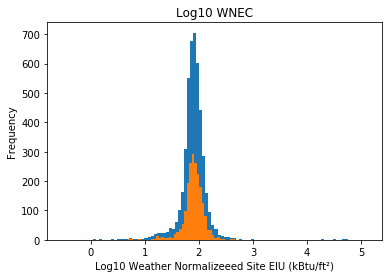

In [125]:
#using only WNEC values larger than 0.1
plotdata = ll84pl[ll84pl['Weather Normalized Site EUI (kBtu/ft²)'] > 0.1]
plotreddata = ll84plred[ll84plred['Weather Normalized Site EUI (kBtu/ft²)'] > 0.1]

#log10 of WNEC values
plotData = np.log10(plotdata['Weather Normalized Site EUI (kBtu/ft²)'])
plotRedData = np.log10(plotreddata['Weather Normalized Site EUI (kBtu/ft²)'])

#plotting histograms and adding axis labels
pl.hist(plotData, 100 )
pl.hist(plotRedData, 100 )
pl.xlabel("Log10 Weather Normalizeeed Site EIU (kBtu/ft²)")
pl.ylabel("Frequency")
pl.title("Log10 WNEC")

inferences on this feature would **NOT** be affected by this way of dealing with missing data, as both distributions have close to the same shape.

##All students

In [145]:
# dropping buildings for which WN Site EUI is NaN
wnec = "Weather Normalized Site EUI (kBtu/ft²)"
ll84plOwner = ll84plmerged[np.isfinite(ll84plmerged[wnec].apply(pd.to_numeric, errors = 'coerce'))]
ll84plOwner.shape

(4603, 156)

###Analysis: Owner Investigation

In [146]:
ll84MaxEnergy = ll84plOwner[ll84plOwner[wnec]==np.max(ll84plOwner[wnec])]
ll84MaxEnergy

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
81,126,2826188,Warren Weaver Hall,3616399,New York University: Washington Square,1.005350e+09,1005350036,1008627,251 Mercer Street,Not Available,10012,17.0,WEST 3 STREET,Manhattan,119170.0,College/University,College/University,College/University,158590.0,Not Available,Not Available,Not Available,Not Available,1966,1,100,Whole Building,Not Available,Not Available,9915.6,9958.6,44,94.3,10755.3,Not Available,5.28183967E7,Not Available,Not Available,Not Available,Not Available,...,14182650.0,2421000.0,14182650.0,1975.0,0.0,0.0,NaN,NaN,5.43,3.44,0.0,6.5,1.0,1.005350e+09,0.0,5501.0,985450.0,204752.0,12c,NaN,103 008,10207,NaN,0.0,NaN,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


<span style="color:red">**-0.25 pt: wrong building for highest consuming building of single owner**</span>

In [147]:
ll84AllOwned = ll84plOwner[ll84plOwner["Parent Property Id"] == np.max(ll84MaxEnergy["Parent Property Id"])]
ll84AllOwned.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),...,assesstot,exemptland,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,mappluto_f,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
72,117,2921191,"Silver Tower 1,2&Garage",3616399,New York University: Washington Square,1.005240e+09,1005240066,1008243,110 Bleeker Street,Not Available,10012,100.0,BLEECKER STREET,Manhattan,518647.0,Multifamily Housing,"Multifamily Housing, Parking",Multifamily Housing,454925.0,Parking,62351,Not Available,Not Available,1966,1,100,Another configuration,Whole Building,100,5.4,5.5,1,0,12.8,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,33180300.0,14760000.0,33180300.0,1967.0,2015.0,2016.0,NaN,INDIVIDUAL LANDMARK,2.76,6.02,2.0,6.5,1.0,1.005240e+09,0.0,5501.0,984817.0,204067.0,12c,NaN,103 008,10206,R-218,1.005240e+09,7/29/2016,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
73,118,2825704,Mercer Street Residence,3616399,New York University: Washington Square,1.005320e+09,1005320008,1066869;1086637,240 Mercer Street,Not Available,10012,246.0,MERCER STREET,Manhattan,307312.0,Residence Hall/Dormitory,Residence Hall/Dormitory,Residence Hall/Dormitory,298336.0,Not Available,Not Available,Not Available,Not Available,1981,1,100,Whole Building,Not Available,100,8.1,8.2,2,0,22.6,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,30086550.0,2326500.0,30086550.0,1980.0,0.0,0.0,NoHo Historic District,NaN,7.68,6.02,6.0,6.5,1.0,1.005320e+09,0.0,5501.0,985512.0,204401.0,12c,NaN,103 009,10207,NaN,0.000000e+00,NaN,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
74,119,2694253,1 Washington Square Village,3616399,New York University: Washington Square,1.005330e+09,1005330001,1077833,1 Washington Square Village,Not Available,10012,1.0,WASHINGTON SQ VLLGE,Manhattan,1485916.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,306659.0,Not Available,Not Available,Not Available,Not Available,1959,1,100,Whole Building,Whole Building,100,16.1,16.2,4.2,0,47,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,42909300.0,6224742.0,32611068.0,1959.0,1985.0,0.0,NaN,NaN,5.60,6.02,2.0,6.5,1.0,1.005330e+09,0.0,5501.0,985027.0,204534.0,12c,NaN,103 008,10207,R-218,0.000000e+00,NaN,NaN,1.0,18v2.1,2.0,15.0,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
75,120,2706483,3 Washington Square Village,3616399,New York University: Washington Square,1.005330e+09,1005330001,1077835,3 Washington Square Village,Not Available,10012,1.0,WASHINGTON SQ VLLGE,Manhattan,148591

In [140]:
print("Owner of the highest consuming building: {}".format(ll84MaxEnergy['Parent Property Name'][81]) +'\n' + "They own {} buildings".format(ll84AllOwned.shape[0]))

Owner of the highest consuming building: New York University: Washington Square
They own 27 buildings


<span style="color:red">**-0.25 pt: find the most consuming buildings not the least**</span>

In [148]:
ll84Top30 = ll84plOwner
ll84Top30[wnec] = ll84Top30[wnec].astype(float)
#pd.to_numeric(ll84Top30[wnec], errors = 'coerce')
#ll84Top30[wnec].dtype
ll84Top30 = ll84Top30.nlargest(30, wnec)
ll84Top30 = ll84Top30[['Property Name','Parent Property Name','ownername',wnec]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [149]:
ll84Top30

,Property Name,Parent Property Name,ownername,Weather Normalized Site EUI (kBtu/ft²)
3593,St. Mary's Home for Working Girls,Not Applicable: Standalone Property,ST MARYS HOME FOR GIR,126307.4
2962,Rolex Realty Company Inc,Not Applicable: Standalone Property,ROLEX RLTY CO INC,88701.1
3081,950 Third Avenue Company,Not Applicable: Standalone Property,950 THIRD AVENUE LLC,77493.8
2872,4 W 58th Street,Not Applicable: Standalone Property,"58 WEST 58TH UNITS,",57361.3
1971,Manhattan Place Condominium,Not Applicable: Standalone Property,ANTHONY PAUL GIORGIO,54748.3
2869,9 W 57th Street,Not Applicable: Standalone Property,SOLOVIEFF REALTY CO.,51697.6
2838,The Jewel,Not Applicable: Standalone Property,,50621.4
3071,"136 East 56th Street, New York, NY",Not Applicable: Standalone Property,136 E 56TH ST OWNERS,49620.8
2964,Santander Bank New York Building,Not Applicable: Standalone Property,"MIKEONE EK EAST 53, L",32268.7
1865,The Abbey Condominium,Not Applicable: Standalone Property,THE ABBEY CONDOMINIUM,31552.6


The top 30 energy consuming buildings in Manhattan, presented in decreasing order of energy use.

In [150]:
print("Owner of the highest consuming building is: ", ll84MaxEnergy["Parent Property Name"][81])

print("This owner owns ", len(ll84AllOwned["Order"]), " buildings in Manhattan")

Owner of the highest consuming building is:  New York University: Washington Square
This owner owns  27  buildings in Manhattan


### Find average building consumption by owner 


In [155]:
ll84AvgEnergyWorking = ll84plOwner[['ownername',wnec]]
testObject = ll84AvgEnergyWorking.groupby('ownername')

meanFrame = testObject.mean()
countFrame = testObject.count()

meanFrame.insert(1, 'count',countFrame[wnec])
meanFrame.reset_index()

meanFrame = meanFrame[meanFrame['count'] != 1]


#removing row for buildings with out an owner
meanFrame = meanFrame.iloc[1:]

meanFrame.head()

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
125 PARK OWNER LLC,103.450,2
1325 FIFTH AVENUE LLC,109.150,2
161 HOLDING LTD,96.500,3
2-12 PINEHURST LLC,79.850,2
207 SHERMAN ASSOCIATE,80.625,4


In [156]:
#Finding the owner with the highest average WNEC
HighestAvg = meanFrame[meanFrame[wnec] == np.max(meanFrame[wnec])]
HighestAvg

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
COLUMBIA UNIVERSITY,1459.233333,3


In [157]:
#Finding the owner with the highest amount of buildings
HighestCount = meanFrame[meanFrame['count'] == np.max(meanFrame['count'])]
HighestCount

,Weather Normalized Site EUI (kBtu/ft²),count
ownername,,
TRUSTEES OF COLUMBIA,43.086667,45
